In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
data = sns.get_dataset_names()
print(data)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
data = sns.load_dataset('exercise')

In [4]:
data

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [5]:
data.columns

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
data.head(10)

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
5,2,low fat,93,30 min,rest
6,3,low fat,97,1 min,rest
7,3,low fat,97,15 min,rest
8,3,low fat,94,30 min,rest
9,4,low fat,80,1 min,rest


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      90 non-null     int64   
 1   diet    90 non-null     category
 2   pulse   90 non-null     int64   
 3   time    90 non-null     category
 4   kind    90 non-null     category
dtypes: category(3), int64(2)
memory usage: 2.1 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90.0,15.5,8.703932,1.0,8.00,15.5,23.0,30.0
pulse,90.0,99.7,14.858471,80.0,90.25,96.0,103.0,150.0


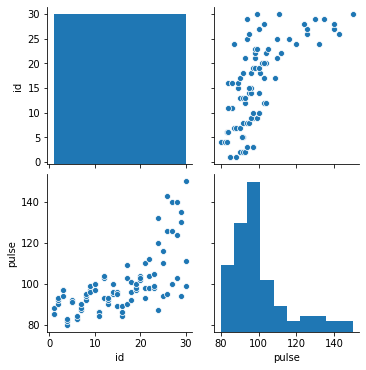

In [10]:
sns.pairplot(data)

<AxesSubplot:xlabel='diet', ylabel='count'>

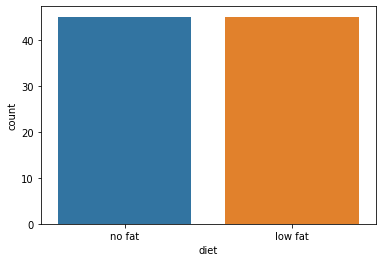

In [11]:
sns.countplot(data['diet'])

<AxesSubplot:xlabel='kind', ylabel='count'>

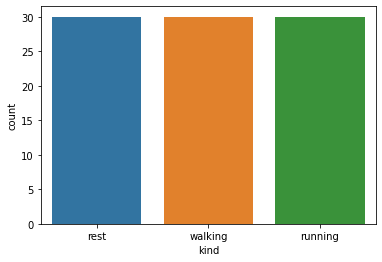

In [12]:
sns.countplot(data['kind'])

<AxesSubplot:xlabel='pulse'>

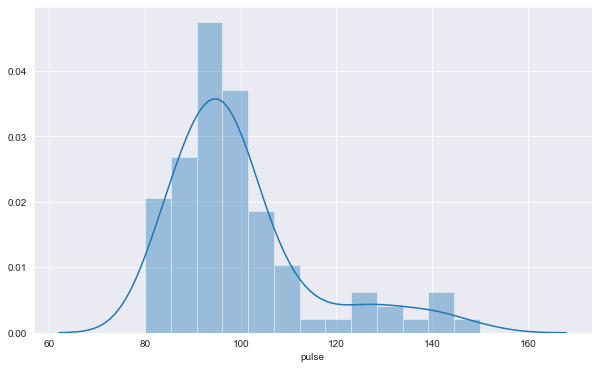

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.distplot(data['pulse'])

In [14]:
time = data['time'].str.split(expand=True)
data['min'] = time[0].astype('int64')
data.head()

,id,diet,pulse,time,kind,min
0,1,low fat,85,1 min,rest,1
1,1,low fat,85,15 min,rest,15
2,1,low fat,88,30 min,rest,30
3,2,low fat,90,1 min,rest,1
4,2,low fat,92,15 min,rest,15


In [15]:
data.drop(['time'], axis=1, inplace=True)

In [16]:
data.dtypes

id          int64
diet     category
pulse       int64
kind     category
min         int64
dtype: object

In [17]:
diet = pd.get_dummies(data['diet'], drop_first=True)
data = pd.concat([data,diet], axis=1)
data.drop(['diet'], axis=1, inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['kind'] = encoder.fit_transform(data['kind'])

In [21]:
data.head()

,id,pulse,kind,min,low fat
0,1,85,0,1,1
1,1,85,0,15,1
2,1,88,0,30,1
3,2,90,0,1,1
4,2,92,0,15,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       90 non-null     int64
 1   pulse    90 non-null     int64
 2   kind     90 non-null     int32
 3   min      90 non-null     int64
 4   low fat  90 non-null     uint8
dtypes: int32(1), int64(3), uint8(1)
memory usage: 2.7 KB


In [23]:
data['fat'] = data['low fat']
data.head()

,id,pulse,kind,min,low fat,fat
0,1,85,0,1,1,1
1,1,85,0,15,1,1
2,1,88,0,30,1,1
3,2,90,0,1,1,1
4,2,92,0,15,1,1


In [24]:
data.drop(['low fat'], axis=1, inplace=True)

In [25]:
data.head()

,id,pulse,kind,min,fat
0,1,85,0,1,1
1,1,85,0,15,1
2,1,88,0,30,1
3,2,90,0,1,1
4,2,92,0,15,1


In [29]:
X = data.drop(['kind'], axis=1)
y = data['kind']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [32]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = log_reg.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print('\n----------------------------------')
print(classification_report(y_test,y_pred))

[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]

----------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

